# Spirtes-Glymour-Scheines (SGS)


<span style="font-family: Calibri; font-size: 14pt;">
This notebook constitutes a comprehensive exploration of the Spirtes-Glymour-Scheines (SGS) algorithm, a cornerstone of causal discovery from observational data. This repository will provide you with a step-by-step guide to understanding and implementing the SGS algorithm in Python. We start by introducing the basic definition and the original description of the algorithm as presented in the seminal book  <i>"Causation, Prediction, and Search"</i> by Peter Spirtes, Clark Glymour, and Richard Scheines. We then delve into the complexity and stability analysis of the SGS algorithm, providing insights into its computational efficiency and robustness to minor input perturbations. The discussion further expands to the consequences of violating the causal assumptions that underpin the SGS algorithm. In the implementation details section, you'll find a practical Python implementation of the SGS algorithm, and finally, an example of its execution on a sample dataset. Whether you're a student, researcher, or data science professional, this repository aims to be a valuable resource for understanding and applying the SGS algorithm in your causal inference journey.
</span>



## Table of Contents


<span style="font-family: Calibri; font-size: 14pt;">

1. Definition
   
2. The SGS Original Algorithm Described in the Book
   
3. SGS Algorithm Complexity Analysis
   
4. SGS Algorithm Stability Analysis
   
5. Violations of the Causal Assumptions
   
6. Implementation Details
   
7. Execution Example

</span>


## 1. Definition

<span style="font-family: Calibri; font-size: 14pt;">
From the book <i>"Causation, Prediction, and Search"</i> by Peter Spirtes, Clark Glymour, and Richard Scheines.</span>

<span style="font-family: Calibri; font-size: 14pt;">
The Spirtes-Glymour-Scheines (SGS) algorithm is a constraint-based algorithm for causal discovery that uses conditional independence tests to determine the presence of causal relationships between variables. It's designed to learn the structure of a Bayesian network from observational data.</span>

<span style="font-family: Calibri; font-size: 14pt;">The algorithm is based on the following assumptions:</span>

`
i. The set of observed variables is causaly sufficient for the set of unobserved variables. This means that the observed variables contain all the information needed to determine the causal structure of the unobserved variables.
`

`
    ii. Every unit in the population has the same causal relations among all variables.
`
`
    iii. The distribution of the observed variables is faithful to an acyclic directed graph of the causal structure (in the discrete case) or linearly faithful to such graphs (in the linear case). The **faithfulness assumption** states that if two variables are conditionally independent given a set of other variables, then there is no edge between them in the causal graph. The faithfulness assumption can be violated if the data is generated by a non-linear model.
`

`
    iv. The statistical decisions required by the algorithms are correct for the population.
`

<span style="font-family: Calibri; font-size: 14pt;">In other words:</span>

`i. Causal Markov Condition: Each variable is independent of its non-descendants given its parents.
`

`
ii. Faithfulness: If two variables are conditionally independent, it's because there is no direct causal path between them, not because of a cancellation effect.
`

`
iii. Causal Sufficiency: There are no hidden confounding variables.
`

`
iv. Acyclicity: The true causal structure can be represented as a Directed Acyclic Graph (DAG), meaning it does not contain any cycles or feedback loops.
`


<span style="font-family: Calibri; font-size: 14pt;"> 
This is a strong set of assumptions that is often not met in practice, but it is no stronger than the assumptions that would be required to warrant most of the particular statistical models with a causal interpretation found in the medical, behavioral, and social scientific literature.</span>



## 2. The SGS Original Algorithm Described in the Book

```pseudo
1. Form the complete undirected graph H on the vertex set V.
2. For each pair of vertices A and B, 
    2.1. If there exists a subset S of V\{A,B} such that A and B are d-separated given S, remove the edge between A and B from H

3. Let K be the undirected graph resulting from step 2. For each triple of vertices A, B, and C such that the pair A and B and the pair B and C are each adjacent in K (written as A - B - C) but the pair A and C are not adjacent in K, orient A - B - C as A → B ← C if and only if there is no subset S of {B} ∪ V\{A,C} that d-separates A and C.

4. Repeat until no more edges can be oriented:
    4.1. If A -> B, B and C are adjacent, A and C are not adjacent, and there is no arrowhead at B, then orient B - C as B -> C
    4.2. If there is a directed path from A to B, and an edge between A and B, then orient A - B as A -> B.


<span style="font-family: Calibri; font-size: 14pt;">
<b>In a more accessible language:</b><br/>
</span>


<span style="font-family: Calibri; font-size: 14pt;">
The algorithm proceeds in three main stages:
</span>

```pseudo
# Skeleton Identification Phase
1. Start with a complete undirected graph on the set of all variables

2. For each pair of variables X and Y in the graph do the following:
    2.1. If X and Y are conditionally independent given some subset of the remaining variables, then remove the edge between X and Y
    
# V-Structure Phase
3. For each pair of non-adjacent variables X and Y, do the following:
    3.1. If there exists a variable Z such the both X -> Z and Y -> Z exist in the graph, add a directed edge X -> Y if there is no subset of remaining variables that X is conditionally independent of Y.

# Orientation Phase
4. While there exists directed edges that can be oriented do the following:
    4.1. For each pair of variables X, Y where X - Y is an edge in the graph and Y - Z is a directed edge for some variable Z, 
        4.1.1. orient X -Y as X -> Y if not orienting it in that way would create a new v-structure that is not justified by the data.
    4.2. For each pair of variables X, Y where X - Y is an edge in the graph and X - Z is a directed edge for some variable Z, 
        4.2.1. orient X - Y as X -> Y if not orienting it in that way would create a cycle.

## 3. SGS Algorithm Complexity Analysis

<span style="font-family: Calibri; font-size: 14pt;">The book states that: </span>

> <span style="font-family: Calibri; font-size: 14pt;">In the worst case, the SGS algorithm requires a number of d-separation tests that increases exponentially with the number of vertices, as must any algorithm based on conditional independence relations or vanishing partial correlations. But the SGS algorithm is very inefficient because for edges in the true graph the worst case is also the expected case</span>

<span style="font-family: Calibri; font-size: 14pt;">
<br/>In a more accessible language, this means that:<br/>

i. As the number of variables (represented as vertices or nodes in the graph) increases, the number of d-separation (or conditional independence) tests that the algorithm must perform can increase exponentially. This is because for each pair of nodes, the algorithm needs to check conditional independence given every possible subset of the remaining nodes. The number of these subsets increases exponentially with the total number of nodes.

ii. For edges that exist in the true underlying causal graph, the expected number of tests that the algorithm must perform is the same as the worst-case number. This suggests that <b><u>the algorithm doesn't take advantage of any potential efficiencies that might exist for edges in the true graph and performs a large number of tests even in average or expected situations</u></b>.
 </span>

<span style="font-family: Calibri; font-size: 14pt;">
 SGS requires a lot of conditional independence tests, especially when there are many variables. However, if we want to be sure that we are correctly finding the relationships between variables, we need to do all of this work. This exponential complexity is unavoidable if we want to ensure reliability. The reason for this is a fundamental property of conditional independence: two variables can be dependent given one set of variables, but independent given a different set (whether it's a subset or a superset). This means that to reliably determine whether two variables are conditionally independent, we need to check all possible subsets of the other variables. Any method that tries to take a shortcut will sometimes get the wrong answer.
 </span>

 ### Complexity

 <span style="font-family: Calibri; font-size: 14pt;">Due to the above explanations, I would say that the complexity of the SGS algorithm is:</span>

$$O(2^n) $$

<span style="font-family: Calibri; font-size: 14pt;">where <i>n</i> is the number of variables in the graph. However, in practice, the time complexity can often be less than this worst-case scenario. The actual time complexity depends on factors such as the sparsity of the graph (i.e., how many edges it has relative to the number of nodes) and the specifics of the conditional independence test being used.</span>

## SGS Algorithm Stability Analysis

 <span style="font-family: Calibri; font-size: 14pt;">The authors define the notion of stability as:</span> 

>  <span style="font-family: Calibri; font-size: 14pt;">If intuitively small errors of input produce intuitively large errors of output, the algorithm is not stable.
</span>

<br/>
<span style="font-family: Calibri; font-size: 14pt;">
For the SGS algorithm, a "small" input error might be a few incorrectly determined d-separation relations. A "small" error in the output of the Skeleton Identification Phase (Step 2) would be a few incorrect edges in the graph, and a "small" error in the output of Step 4 (Edge Orientation) would be a few edges with the wrong orientation.
</span> 

<span style="font-family: Calibri; font-size: 14pt;">
Step 2 of the SGS algorithm is <b><u>considered stable</u></b>. If one correct d-separation relation is left out, the algorithm will still usually produce the correct graph, unless the missed relation is the only evidence that two nodes are not connected. Even in that case, the only error will be that those two nodes are mistakenly connected.</span>

<span style="font-family: Calibri; font-size: 14pt;">
Step 3 of the SGS algorithm is <b><u>less stable</u></b>. <b><u>Small errors in the input, either in the graph or in the list of d-separation relations, can lead to many edges being oriented incorrectly</u></b>. This is because the edges involved in "collisions" (V-structures) play a key role in determining the orientations of other edges in the graph. So, if an error leads the algorithm to incorrectly include or exclude a collision, it may affect many other edge orientations. For example, if an edge is mistakenly left out of the input to Step 3, and that edge is involved in a collision in the true graph, the algorithm might incorrectly require a collision elsewhere, leading to errors in the orientations of many other edges. Similarly, if the true graph contains a collision, but one of the edges involved in the collision is left out of the input to Step 3, the algorithm won't be able to correctly orient the remaining edge, and this uncertainty may affect the orientations of other edges.
</span>

<span style="font-family: Calibri; font-size: 14pt;">
Errors in the list of d-separation relations can also cause instability in Step 3. If a necessary d-separation relation is missing from the input, it might not cause an error unless it's the only evidence that there's no collision at a certain node. But if an unnecessary d-separation relation is included in the input, the algorithm might incorrectly conclude that there's no collision where there actually is one, leading to many other edges being oriented incorrectly.
</span>

## 4. Violations of the Causal Assumptions

<span style="font-family: Calibri; font-size: 14pt;">
In the context of the SGS algorithm, there are four key assumptions:
</span>

```pseudo
1. Causal Markov Condition: Each variable is independent of its non-descendants given its parents.
2. Faithfulness: If two variables are conditionally independent, it's because there is no direct causal path between them, not because of a cancellation effect.
3. Causal Sufficiency: There are no hidden confounding variables.
4. Acyclicity: The true causal structure can be represented as a Directed Acyclic Graph (DAG), meaning it does not contain any cycles or feedback loops.
```

<span style="font-family: Calibri; font-size: 14pt;">
If any of these assumptions are violated, the output of the SGS algorithm may not be a DAG. This could be due to errors in the data or the presence of hidden confounding variables.</span>

<span style="font-family: Calibri; font-size: 14pt;">
A double-headed edge in a graph indicates a bi-directional relationship, which is not allowed in a DAG. The presence of such an edge could imply an error in the input data or a violation of the causal sufficiency assumption.
</span>




<span style="font-family: Calibri; font-size: 14pt;">
Specifically, a double-headed edge might suggest the existence of an unmeasured common cause, also known as a confounder or a hidden variable. This is a variable that influences both variables connected by the double-headed edge but is not included in the dataset. This is an important issue in causal inference because the presence of such hidden variables can lead to spurious associations and biased estimates of causal effects.
</span>

## 5. Implementation

<span style="font-family: Calibri; font-size: 14pt;">
The next sections show an explanation of the implementation of the different phases of the SGS algorithm.
</span>

### 5.1. The Abstract StructureLearningAlgorithm Class

<span style="font-family: Calibri; font-size: 14pt;">
This particular class is designed to serve as a foundation for any algorithm that learns the structure of data. In our case, it'll be used as a basis for implementing the Spirtes-Glymour-Scheines (SGS) algorithm.    
</span>

<span style="font-family: Calibri; font-size: 14pt;">Breaking down our implementation:</span>


```python

class StructureLearningAlgorithm(ABC):
```
<span style="font-family: Calibri; font-size: 14pt;">The class is a subclass of ABC (which stands for Abstract Base Class). This is a special kind of class in Python that can't be used to create objects directly. Instead, it's meant to be a base class for other classes. Any class that inherits from StructureLearningAlgorithm will have to implement certain methods (functions within a class), which are marked by the @abstractmethod decorator.</span>


#### __init__(self) Method

<span style="font-family: Calibri; font-size: 14pt;">
It is the class constructor, which is a special method that gets called when you create an object from the class. In this case, it's setting up two empty graphs: self.graph (an undirected graph) and self.dag (a directed graph). These graphs will be used to store the learned structure (the undirected graph structure gets modified throughout the algorithm and the final learned DAG). If the algorithm could not learn any structure, then it will return a DAG with no edges.
</span>

```python
    def __init__(self):
        self.graph = nx.classes.graph.Graph()
        self.dag = nx.DiGraph()
```

#### fit(self, data) method

<span style="font-family: Calibri; font-size: 14pt;">
This is an abstract method, meaning it does not do anything in this class but must be implemented by any subclass, in other words any structure learning algorithm that we will develop in this repository will have to implement this method. The fit method is where the structure learning algorithm will be applied to the data.
</span>

```python
    @abstractmethod
    def fit(self, data):
        pass
```


#### get_structure(self) method

<span style="font-family: Calibri; font-size: 14pt;">
This is another abstract method that must be implemented by any subclass. The get_structure method is where the learned structure (the output of the algorithm) will be returned.
</span>

```python
    @abstractmethod
    def get_structure(self):
        pass

### 5.2. The SGS Class

The class `SGS` stands for the Spirtes-Glymour-Scheines algorithm, a method used for learning causal structures from data.

This class is part of a broader family of classes, or a 'subclass', of `StructureLearningAlgorithm`, which I defined earlier as a blueprint for any algorithm that learns structures from data.

Let's break down the parts of the `SGS` class:

1. **Initialization (`def __init__(self):`):** This part sets up the class when an instance is created. For the `SGS` class, it initializes two types of graphs: an undirected graph (`self.graph`) and a directed graph (`self.dag`).

2. **Fitting the model (`def fit(self, data):`):** This is where the bulk of the work happens. The `fit` function applies the SGS algorithm to the provided data. This involves three main steps:

    - **Skeleton Identification Phase:** The function starts by calling the `skeleton_phase` method on the data. This phase aims to identify the "skeleton" or basic structure of the graph by testing for conditional independence between each pair of variables. If two variables are found to be conditionally independent given some subset of the remaining variables, the edge between these two variables is removed from the graph.

    - **V-structure Orientation Phase:** Next, the function calls the `v_structure_phase` method on the data. This phase is all about identifying specific patterns in the graph known as 'V-structures'. These are situations where two variables both have an effect on a third variable, but do not affect each other.

    - **Remaining Edge Orientation Phase:** Finally, the function calls the `orientation_phase` method. This phase takes the graph with identified V-structures and further refines the directions of the remaining edges based on the identified V-structures.

By the end of the `fit` function, the algorithm has learned the structure of the data, resulting in a Directed Acyclic Graph (DAG) where the nodes represent variables, and the edges represent the causal relationships between them. The function returns the instance of the `SGS` class itself, now fitted with the learned structure.

This `SGS` class provides a convenient way to apply the SGS algorithm to a dataset and retrieve the learned structure. The learned structure can then be used for various purposes, such as making predictions, interpreting causal relationships, or further statistical analysis.

### 5.2.1. Skeleton Phase ------------------------------------------------------------

<span style="font-family: Calibri; font-size: 14pt;">
The Skeleton Identification phase helps to find a basic structure or "skeleton" of the causal relationships between the variables in our data.</span>
<br/>


<span style="font-family: Calibri; font-size: 14pt;">
Let's break this function down into simple steps:</span><br/><br/>


<span style="font-family: Calibri; font-size: 14pt;">
<b>1. <u>Looping over all pairs of variables:</u></b> The function starts by looking at each pair of variables (nodes) in our data. We refer to these variables as X and Y. The purpose here is to examine every possible relationship in our dataset.</span>

 ```python
 #For each pair of variables X and Y in the graph
for node1 in self.graph.nodes:
    for node2 in self.graph.nodes:        
        if node1 == node2: # ignore if we are comparing the same variables
            continue
 ```

<span style="font-family: Calibri; font-size: 14pt;">
<b>2. <u>Testing for conditional independence:</u></b> For each pair of variables, the function then checks if X and Y are "conditionally independent" given some subset of the other variables. In simpler terms, it checks if there's a set of other variables that, when known, makes X and Y unrelated. This piece of code starts selects the list of nodes of the graph except X and Y, and generates subsets of variables Z. Then, for each subset of Z, it will test X ind Y given Z </span>

```python
# Check conditional independence
# If X and Y are conditionally independent given some subset of the remaining variables, 
# then remove the edge between X and Y 
subsets = generate_subsets( remove_vars_from_list(list(self.graph.nodes()), [node1, node2]) )
for node3 in subsets:
    independent = test_conditional_independence(data, node1, node2, list(node3), verbose=verbose)
```

<span style="font-family: Calibri; font-size: 14pt;">
<b>3. <u>Removing edges:</u></b> If X and Y are found to be conditionally independent given some subset of the other variables, the "edge" or connection between X and Y in the graph is removed. This is because we've determined that there's no direct relationship between them (given the variables we know).</span>

```python
if independent:
    if self.graph.has_edge(node1, node2):
        self.graph.remove_edge(node1, node2)
```

<span style="font-family: Calibri; font-size: 14pt;">
<b>4. <u>Verbose option:</u></b> If the "verbose" option is set to True, the function will print out extra information about the conditional independence tests it performs. This can be helpful if you want to see what's going on "under the hood" of the function. This is used for debugging purposes</span>

```python
[print(f"\tPr({node1} || {node2}) | {list(node3)}: {independent}") if independent and verbose else None]
[print(f"----------------------------------------") if independent and verbose else None]
```



### 5.2.2. V-Structure Phase ------------------------------------------------------------

<span style="font-family: Calibri; font-size: 14pt;">
The V-Structure Orientation phase is all about identifying specific patterns in our data, known as 'V-structures'. These patterns are important clues to causal relationships in our data.</span><br/><br/>

<span style="font-family: Calibri; font-size: 14pt;">
Here's how the function works:
</span><br/><br/>


<span style="font-family: Calibri; font-size: 14pt;">
<b>1. <u>Setting up the Directed Acyclic Graph (DAG)</u>:</b> The function starts by adding each variable (node) from our original graph to our new directed graph (the dag). A directed graph is one where the connections between variables (edges) have a direction - like arrows pointing from one variable to another.</span>

```python
[self.dag.add_node(node) for node in  self.graph.nodes()]
```

<span style="font-family: Calibri; font-size: 14pt;">
<b>2. <u>Identifying V-structures</u>:</b> The function then loops over every possible combination of three variables (X, Y, Z) in our data. It's looking for sets of variables that form a 'V-structure' - a pattern where X and Z are both connected to Y, but X and Z aren't directly connected to each other.</span><br/><br/>

<span style="font-family: Calibri; font-size: 14pt;">
Here's what it checks for each set of three variables:</span><br/>

- <span style="font-family: Calibri; font-size: 14pt;">First, it checks if any of the variables are the same. If they are, it skips to the next set of variables.</span>
```python
    # Identify all triples (X, Y, Z) that form a V-structure X -> Y <- Z
    for X in self.graph.nodes():
        for Y in self.graph.nodes():
            for Z in self.graph.nodes():
                
                if X == Y or X == Z or Y == Z:
                    continue
```
- <span style="font-family: Calibri; font-size: 14pt;">Then, it checks if X and Z are directly connected or conditionally independent given Y. If either of these is true, then there is no V-Structure and we can skip to the next set of variables.</span>
```python
                if self.graph.has_edge(X, Z) or test_conditional_independence(data, X, Z, [Y], verbose=verbose):
                    continue

```
- <span style="font-family: Calibri; font-size: 14pt;">If it's made it this far, it's found a V-structure! It makes sure there are edges from X to Y and from Z to Y in both the original graph and the DAG. It also registers these structures by adding a label to the edge "v-struct"</span>

```python
                if not self.graph.has_edge(X, Y):
                    self.graph.add_edge(X, Y, arrowhead='v-struct')
                
                if not self.dag.has_edge(X, Y):
                    self.dag.add_edge(X, Y)
                
                if not self.graph.has_edge(Z, Y):
                    self.graph.add_edge(Z, Y, arrowhead='v-struct')
                
                if not self.dag.has_edge(Z, Y):
                    self.dag.add_edge( Z, Y)
```



### 5.2.3. Orientation Phase ------------------------------------------------------------





<span style="font-family: Calibri; font-size: 14pt;">
The Orientation phase is responsible for refining the directions of the remaining connections between the variables, using the 'V-structures' we identified in the previous phase.</span><br/><br/>

<span style="font-family: Calibri; font-size: 14pt;">
Let's take a closer look at how the function works:</span><br/><br/>

- <span style="font-family: Calibri; font-size: 14pt;"><b>1. <u>The loop: The function starts with a while True</u>:</b> loop, which will keep running until we explicitly tell it to stop. This is because we don't know in advance how many iterations we'll need to properly orient all the edges. We'll keep going until there are no more changes to make.</span>

- <span style="font-family: Calibri; font-size: 14pt;">Checking each edge: Inside the loop, the function goes through each connection (edge) between pairs of variables (nodes) in our graph. If a connection has already been given a direction, it skips to the next one.</span>
```python
        change = False
        for edge in list(self.graph.edges):
                
            node1, node2 = edge
                
            # if this edge is already oriented, skip it
            if 'arrowhead' in self.graph[node1][node2]:
                continue
```

- <span style="font-family: Calibri; font-size: 14pt;"><b>2. <u>Looking for V-structures</u>:</b> For each connection between two nodes (node1 and node2), the function then looks at all other nodes connected to node1 (and not node2). If it finds a V-structure with node1 and this other node, it adds a directed edge from node1 to node2. It does the same thing for all other nodes connected to node2.</span>
```python
            # for all nodes connected to node1 that are not node2
            for node3 in self.graph.neighbors(node1):
                if node3 == node2 or not self.graph.has_edge(node1, node3):
                    continue
                
                # check if there is a v-structure connecting node1 and node3
                # then add an edge node1 -> node2
                if 'arrowhead' in self.graph[node1][node3] and self.graph[node1][node3]['arrowhead'] == 'v-struct':
                    self.graph.add_edge(node1, node2, arrowhead='v-struct')
                    self.dag.add_edge(node1, node2)
                    change = True    
                    break

            # for all nodes connected to node1 that are not node2
            for node3 in self.graph.neighbors(node2):
                if node3 == node1 or not self.graph.has_edge(node2, node3):
                    continue
                
                if 'arrowhead' in self.graph[node2][node3] and self.graph[node2][node3]['arrowhead'] == 'v-struct':
                    self.graph.add_edge(node2, node1, arrowhead='v-struct')
                    self.dag.add_edge(node2, node1)
                    change = True
                    break
```

- <span style="font-family: Calibri; font-size: 14pt;"><b>3. <u>Checking for changes</u>:</b> If the function made any changes in the current iteration (added any directed edges), it'll go back to the start of the loop and check all the edges again. If it didn't make any changes, that means it's done - all the edges that can be oriented have been oriented, and it's time to stop the loop.</span>

- <span style="font-family: Calibri; font-size: 14pt;"><b>4. <u>Returning the result</u>:</b> Once the loop is done, the function returns the updated graph with all the properly oriented edges.</span>

<span style="font-family: Calibri; font-size: 14pt;">
By the end of this phase, we've assigned a direction to as many of the connections between variables as we can, based on the V-structures we found earlier. This gives us a better picture of the causal relationships in our data - not just which variables are related, but how they influence each other. This is the final output of the SGS algorithm.</span>

## 6. Execution

### 6.1. The Model

<span style="font-family: Calibri; font-size: 14pt;">
Let's suppose that the groundtruth causal graph is the following:
</scan>

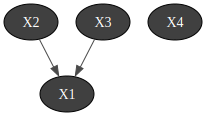

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

cbn = gum.fastBN("X1<-X2;X4;X1<-X3")
gnb.showBN(cbn)

### 6.2. The Dataset

In [2]:
import pandas as pd

data = pd.read_csv( "data/bn_data.csv" , sep='\t')
data

,X1,X2,X3,X4
0,0.56,0.48,0.60,0.05
1,0.46,0.40,0.45,0.26
2,0.58,0.62,0.69,0.76
3,0.45,0.57,0.52,0.44
4,0.35,0.69,0.46,0.69
...,...,...,...,...
994,0.64,0.22,0.57,0.54
995,0.37,0.62,0.46,0.93
996,0.52,0.46,0.53,0.16
997,0.36,0.57,0.42,0.51


### 6.3. Structure Learning

In [3]:
from src.StructureLearning import StructureLearningAlgorithm
from src.SGS import SGS


SGS_model = SGS()
SGS_model.fit(data)

dag = SGS_model.get_structure()

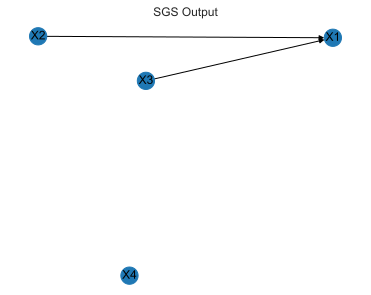

In [4]:
from src.util import *

plot_skeleton( dag, "SGS Output" )

### 6.4. Debugging

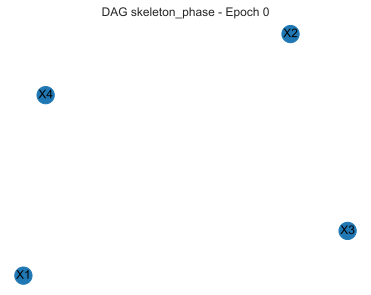

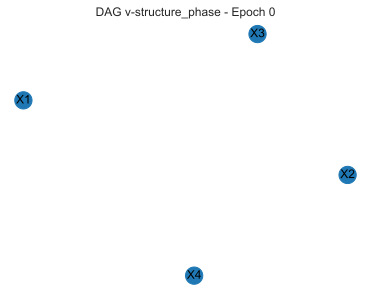

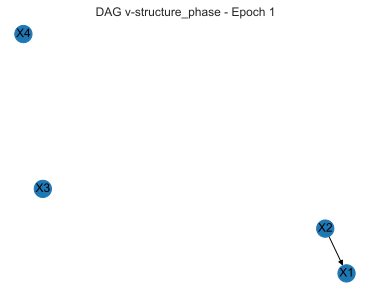

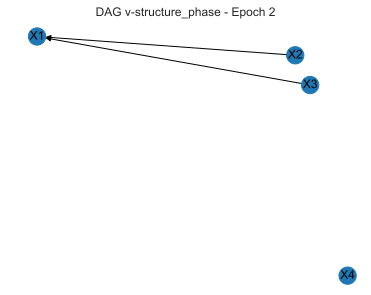

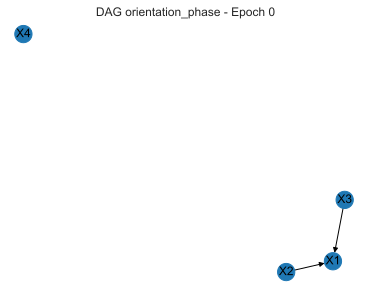

In [5]:
dag_history = SGS_model.get_debug_dag()
phases = dag_history.keys()
for phase in phases:
    for epoch in range(0,len(dag_history[phase])):
        plot_skeleton( dag_history[phase][epoch], "DAG " + phase + " - Epoch " + str(epoch))

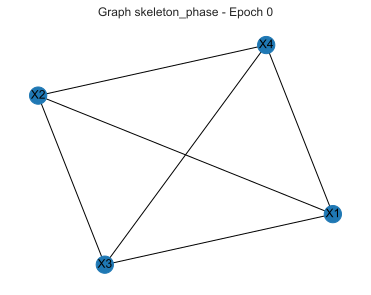

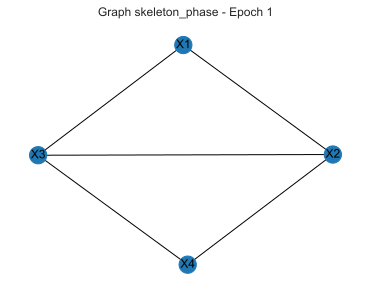

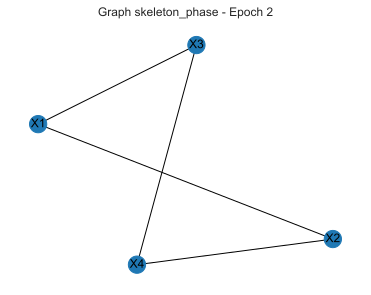

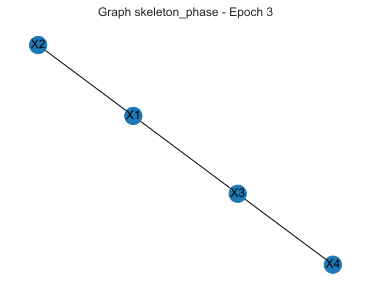

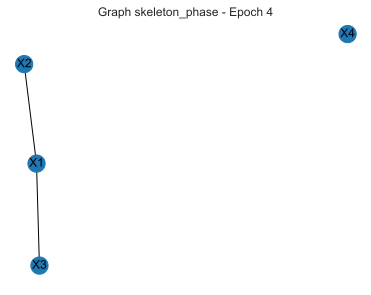

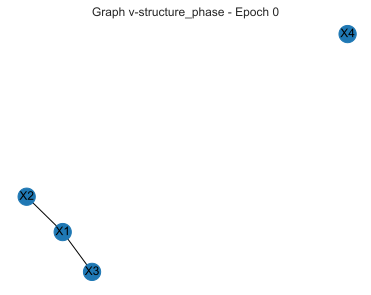

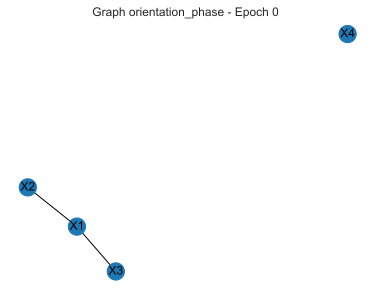

In [6]:
graph_history = SGS_model.get_debug_graph()
phases = graph_history.keys()
for phase in phases:
    for epoch in range(len(graph_history[phase])):
        plot_skeleton( graph_history[phase][epoch], "Graph " + phase + " - Epoch " + str(epoch))